In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.stats.api as sms
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.svm import SVC
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.metrics import mean_absolute_error
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm
import xgboost as xgb

C:\Users\Public\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv(r'eviction_census_no_dates.csv',index_col='tract_id')

In [3]:
data.head()

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,...,Hispanic or Latino,white_pop_%,black_pop_%,native_american_pop_%,asian_pop_%,other_race_%,hispanic_pop_%,%_owner_housing,%_rental_housing,#_evictions
tract_id,,,,,,,,,,,,,,,,,,,,,
"Census Tract 9, Richmond County, New York",5,5000900,Staten Island,E,900,9.0,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,...,445,0.339540,0.471522,0.000000,0.122673,0.003834,0.243702,0.405882,0.594118,40.0
"Census Tract 98, New York County, New York",1,1009800,Manhattan,I,9800,98.0,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,...,424,0.830972,0.020000,0.000972,0.127222,0.010139,0.058889,0.448366,0.551634,39.0
"Census Tract 100, New York County, New York",1,1010000,Manhattan,I,10000,100.0,MN19,Turtle Bay-East Midtown,3808,1.860938e+06,...,61,0.792421,0.019796,0.000000,0.171946,0.000000,0.034502,0.234835,0.765165,17.0
"Census Tract 102, New York County, New York",1,1010200,Manhattan,I,10200,102.0,MN17,Midtown-Midtown South,3807,1.860993e+06,...,11,0.640000,0.000000,0.230000,0.020000,0.000000,0.110000,0.551020,0.448980,17.0
"Census Tract 104, New York County, New York",1,1010400,Manhattan,I,10400,104.0,MN17,Midtown-Midtown South,3807,1.864600e+06,...,103,0.704026,0.023939,0.000000,0.194777,0.062024,0.112078,0.499124,0.500876,14.0


In [4]:
data.columns

Index(['boro_code', 'boro_ct201', 'boro_name', 'cdeligibil', 'ct2010',
       'ctlabel', 'ntacode', 'ntaname', 'puma', 'shape_area', 'shape_leng',
       'geometry', 'county_name', 'id', 'Total population',
       'Median age (years)', 'Sex ratio (males per 100 females)',
       'Age dependency ratio', 'Occupied housing units',
       'Owner-occupied housing units', 'Renter-occupied housing units',
       'Households below poverty level (12 months)',
       'Median household income (2018 inflation adjusted)',
       'Households receiving food stamps (12 months)', 'Families',
       'White alone', 'Black or African American alone',
       'American Indian and Alaska Native alone', 'Asian alone',
       'Some other race alone', 'Hispanic or Latino', 'white_pop_%',
       'black_pop_%', 'native_american_pop_%', 'asian_pop_%', 'other_race_%',
       'hispanic_pop_%', '%_owner_housing', '%_rental_housing', '#_evictions'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2165 entries, Census Tract 9, Richmond County, New York to Census Tract 248, Richmond County, New York
Data columns (total 40 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   boro_code                                          2165 non-null   int64  
 1   boro_ct201                                         2165 non-null   int64  
 2   boro_name                                          2165 non-null   object 
 3   cdeligibil                                         2164 non-null   object 
 4   ct2010                                             2165 non-null   int64  
 5   ctlabel                                            2165 non-null   float64
 6   ntacode                                            2165 non-null   object 
 7   ntaname                                            2165 non-null   object 
 8   puma          

In [6]:
data['households_below_poverty_level_per_housing_unit']=data['Households below poverty level (12 months)']/data['Occupied housing units']

In [7]:
list(data.columns)

['boro_code',
 'boro_ct201',
 'boro_name',
 'cdeligibil',
 'ct2010',
 'ctlabel',
 'ntacode',
 'ntaname',
 'puma',
 'shape_area',
 'shape_leng',
 'geometry',
 'county_name',
 'id',
 'Total population',
 'Median age (years)',
 'Sex ratio (males per 100 females)',
 'Age dependency ratio',
 'Occupied housing units',
 'Owner-occupied housing units',
 'Renter-occupied housing units',
 'Households below poverty level (12 months)',
 'Median household income (2018 inflation adjusted)',
 'Households receiving food stamps (12 months)',
 'Families',
 'White alone',
 'Black or African American alone',
 'American Indian and Alaska Native alone',
 'Asian alone',
 'Some other race alone',
 'Hispanic or Latino',
 'white_pop_%',
 'black_pop_%',
 'native_american_pop_%',
 'asian_pop_%',
 'other_race_%',
 'hispanic_pop_%',
 '%_owner_housing',
 '%_rental_housing',
 '#_evictions',
 'households_below_poverty_level_per_housing_unit']

In [8]:
important_col = ['boro_name',
                 'Total population',
                 'Median age (years)',
                 'Sex ratio (males per 100 females)',
                 'Age dependency ratio',
                 'Occupied housing units',
                 'Owner-occupied housing units',
                 'Renter-occupied housing units',
                 'Households below poverty level (12 months)',
                 'Median household income (2018 inflation adjusted)',
                 'Households receiving food stamps (12 months)',
                 'Families',
                 'White alone',
                 'Black or African American alone',
                 'American Indian and Alaska Native alone',
                 'Asian alone',
                 'Some other race alone',
                 'Hispanic or Latino',
                 'white_pop_%',
                 'black_pop_%',
                 'native_american_pop_%',
                 'asian_pop_%',
                 'other_race_%',
                 'hispanic_pop_%',
                 '%_owner_housing',
                 '%_rental_housing',
                 '#_evictions',
                 'households_below_poverty_level_per_housing_unit']

In [9]:
data=data[important_col]

In [10]:
data['evictions_per_capita']= data['#_evictions']/data['Total population']

In [11]:
dependent_variables = ['evictions_per_capita']

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2165 entries, Census Tract 9, Richmond County, New York to Census Tract 248, Richmond County, New York
Data columns (total 29 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   boro_name                                          2165 non-null   object 
 1   Total population                                   2165 non-null   int64  
 2   Median age (years)                                 2121 non-null   float64
 3   Sex ratio (males per 100 females)                  2117 non-null   float64
 4   Age dependency ratio                               2117 non-null   float64
 5   Occupied housing units                             2165 non-null   int64  
 6   Owner-occupied housing units                       2165 non-null   int64  
 7   Renter-occupied housing units                      2165 non-null   int64  
 8   Households bel

In [13]:
data['boro_name'].unique()

array(['Staten Island', 'Manhattan', 'Brooklyn', 'Bronx', 'Queens'],
      dtype=object)

In [14]:
data_dummies = pd.get_dummies(data,columns=['boro_name'],drop_first=True)

In [15]:
data_dummies.head()

,Total population,Median age (years),Sex ratio (males per 100 females),Age dependency ratio,Occupied housing units,Owner-occupied housing units,Renter-occupied housing units,Households below poverty level (12 months),Median household income (2018 inflation adjusted),Households receiving food stamps (12 months),...,hispanic_pop_%,%_owner_housing,%_rental_housing,#_evictions,households_below_poverty_level_per_housing_unit,evictions_per_capita,boro_name_Brooklyn,boro_name_Manhattan,boro_name_Queens,boro_name_Staten Island
tract_id,,,,,,,,,,,,,,,,,,,,,
"Census Tract 9, Richmond County, New York",1826,32.9,104.5,59.6,680,276,404,206,53523.0,98,...,0.243702,0.405882,0.594118,40.0,0.302941,0.021906,0,0,0,1
"Census Tract 98, New York County, New York",7200,42.0,95.0,45.6,4222,1893,2329,198,126500.0,18,...,0.058889,0.448366,0.551634,39.0,0.046897,0.005417,0,1,0,0
"Census Tract 100, New York County, New York",1768,33.8,66.3,23.0,1154,271,883,104,94938.0,30,...,0.034502,0.234835,0.765165,17.0,0.090121,0.009615,0,1,0,0
"Census Tract 102, New York County, New York",100,40.4,212.5,69.5,49,27,22,7,128750.0,0,...,0.110000,0.551020,0.448980,17.0,0.142857,0.170000,0,1,0,0
"Census Tract 104, New York County, New York",919,52.7,72.1,49.9,571,285,286,30,125156.0,6,...,0.112078,0.499124,0.500876,14.0,0.052539,0.015234,0,1,0,0


In [16]:
data_dummies.columns

Index(['Total population', 'Median age (years)',
       'Sex ratio (males per 100 females)', 'Age dependency ratio',
       'Occupied housing units', 'Owner-occupied housing units',
       'Renter-occupied housing units',
       'Households below poverty level (12 months)',
       'Median household income (2018 inflation adjusted)',
       'Households receiving food stamps (12 months)', 'Families',
       'White alone', 'Black or African American alone',
       'American Indian and Alaska Native alone', 'Asian alone',
       'Some other race alone', 'Hispanic or Latino', 'white_pop_%',
       'black_pop_%', 'native_american_pop_%', 'asian_pop_%', 'other_race_%',
       'hispanic_pop_%', '%_owner_housing', '%_rental_housing', '#_evictions',
       'households_below_poverty_level_per_housing_unit',
       'evictions_per_capita', 'boro_name_Brooklyn', 'boro_name_Manhattan',
       'boro_name_Queens', 'boro_name_Staten Island'],
      dtype='object')

In [17]:
data_dummies.columns=data_dummies.columns.str.replace('boro_name_','')

default borough is the Bronx

In [18]:
def corr_check(df,threshold):
    corr_pd = pd.DataFrame(columns=['var1','var2','corr'])
    var1 =[]
    var2 =[]
    corr =[]
    for i in range(len(df.columns)):
        for l in range(i+1,len(df.columns)):
            corr_score = df[df.columns[i]].corr(df[df.columns[l]])
            var1.append(df.columns[i])
            var2.append(df.columns[l])
            corr.append(corr_score)

    corr_pd=pd.DataFrame({'var1':var1,'var2':var2,'corr':corr})
    return corr_pd[np.abs(corr_pd['corr'])>threshold]
    

In [19]:
corr_check(data_dummies,.75)

,var1,var2,corr
3,Total population,Occupied housing units,0.918913
5,Total population,Renter-occupied housing units,0.831936
9,Total population,Families,0.950623
119,Occupied housing units,Renter-occupied housing units,0.890750
123,Occupied housing units,Families,0.867033
197,Households below poverty level (12 months),Households receiving food stamps (12 months),0.935247
259,Households receiving food stamps (12 months),households_below_poverty_level_per_housing_unit,0.769664
311,Black or African American alone,black_pop_%,0.785181
348,Asian alone,asian_pop_%,0.833083
360,Some other race alone,Hispanic or Latino,0.920634


Total population is highly correlated with occupied housing units and families suggesting only looking at evictions per capita is sufficient.  It is also unsurprising that you would find more renters in high population areas (high correlation)
Households below poverty level and households receiving food stamps are very similar as well
other race % is unnecessary since it is highly correlated with hispanic_pop_%

In [20]:
data_dummies.columns

Index(['Total population', 'Median age (years)',
       'Sex ratio (males per 100 females)', 'Age dependency ratio',
       'Occupied housing units', 'Owner-occupied housing units',
       'Renter-occupied housing units',
       'Households below poverty level (12 months)',
       'Median household income (2018 inflation adjusted)',
       'Households receiving food stamps (12 months)', 'Families',
       'White alone', 'Black or African American alone',
       'American Indian and Alaska Native alone', 'Asian alone',
       'Some other race alone', 'Hispanic or Latino', 'white_pop_%',
       'black_pop_%', 'native_american_pop_%', 'asian_pop_%', 'other_race_%',
       'hispanic_pop_%', '%_owner_housing', '%_rental_housing', '#_evictions',
       'households_below_poverty_level_per_housing_unit',
       'evictions_per_capita', 'Brooklyn', 'Manhattan', 'Queens',
       'Staten Island'],
      dtype='object')

In [21]:
#adjusted model to remove unnecessary features
model_cols=[
       # 'Median age (years)',
       #'Sex ratio (males per 100 females)', 'Age dependency ratio',
       'Median household income (2018 inflation adjusted)', 'households_below_poverty_level_per_housing_unit',
       'white_pop_%', 
      #'black_pop_%', 'native_american_pop_%', 'asian_pop_%','hispanic_pop_%',
       '%_owner_housing',
       'evictions_per_capita','Brooklyn', 'Manhattan',
       'Queens', 'Staten Island']

While there is an argument to be made for identifying a difference between different minority groups, the parsimony of using only white_pop_% should capture most of the variance of the other minority groups.

In [22]:
corr_check(data_dummies[model_cols],.5)

,var1,var2,corr
0,Median household income (2018 inflation adjusted),households_below_poverty_level_per_housing_unit,-0.742950
1,Median household income (2018 inflation adjusted),white_pop_%,0.504469
9,households_below_poverty_level_per_housing_unit,%_owner_housing,-0.634473


While white and black pop % are highly correlated, thematically it makes sense to include both because they are not as strongly correlated as say renting and ownership are which are explicit opposite.

Consider multiplier effect for not white and poverty

In [23]:
model_data = data_dummies[model_cols]

In [24]:
#add interactions
model_data['white_household_poverty_interaction']=model_data['white_pop_%']*model_data['households_below_poverty_level_per_housing_unit']

C:\Users\Public\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
model_data.head()

,Median household income (2018 inflation adjusted),households_below_poverty_level_per_housing_unit,white_pop_%,%_owner_housing,evictions_per_capita,Brooklyn,Manhattan,Queens,Staten Island,white_household_poverty_interaction
tract_id,,,,,,,,,,
"Census Tract 9, Richmond County, New York",53523.0,0.302941,0.339540,0.405882,0.021906,0,0,0,1,0.102861
"Census Tract 98, New York County, New York",126500.0,0.046897,0.830972,0.448366,0.005417,0,1,0,0,0.038970
"Census Tract 100, New York County, New York",94938.0,0.090121,0.792421,0.234835,0.009615,0,1,0,0,0.071414
"Census Tract 102, New York County, New York",128750.0,0.142857,0.640000,0.551020,0.170000,0,1,0,0,0.091429
"Census Tract 104, New York County, New York",125156.0,0.052539,0.704026,0.499124,0.015234,0,1,0,0,0.036989


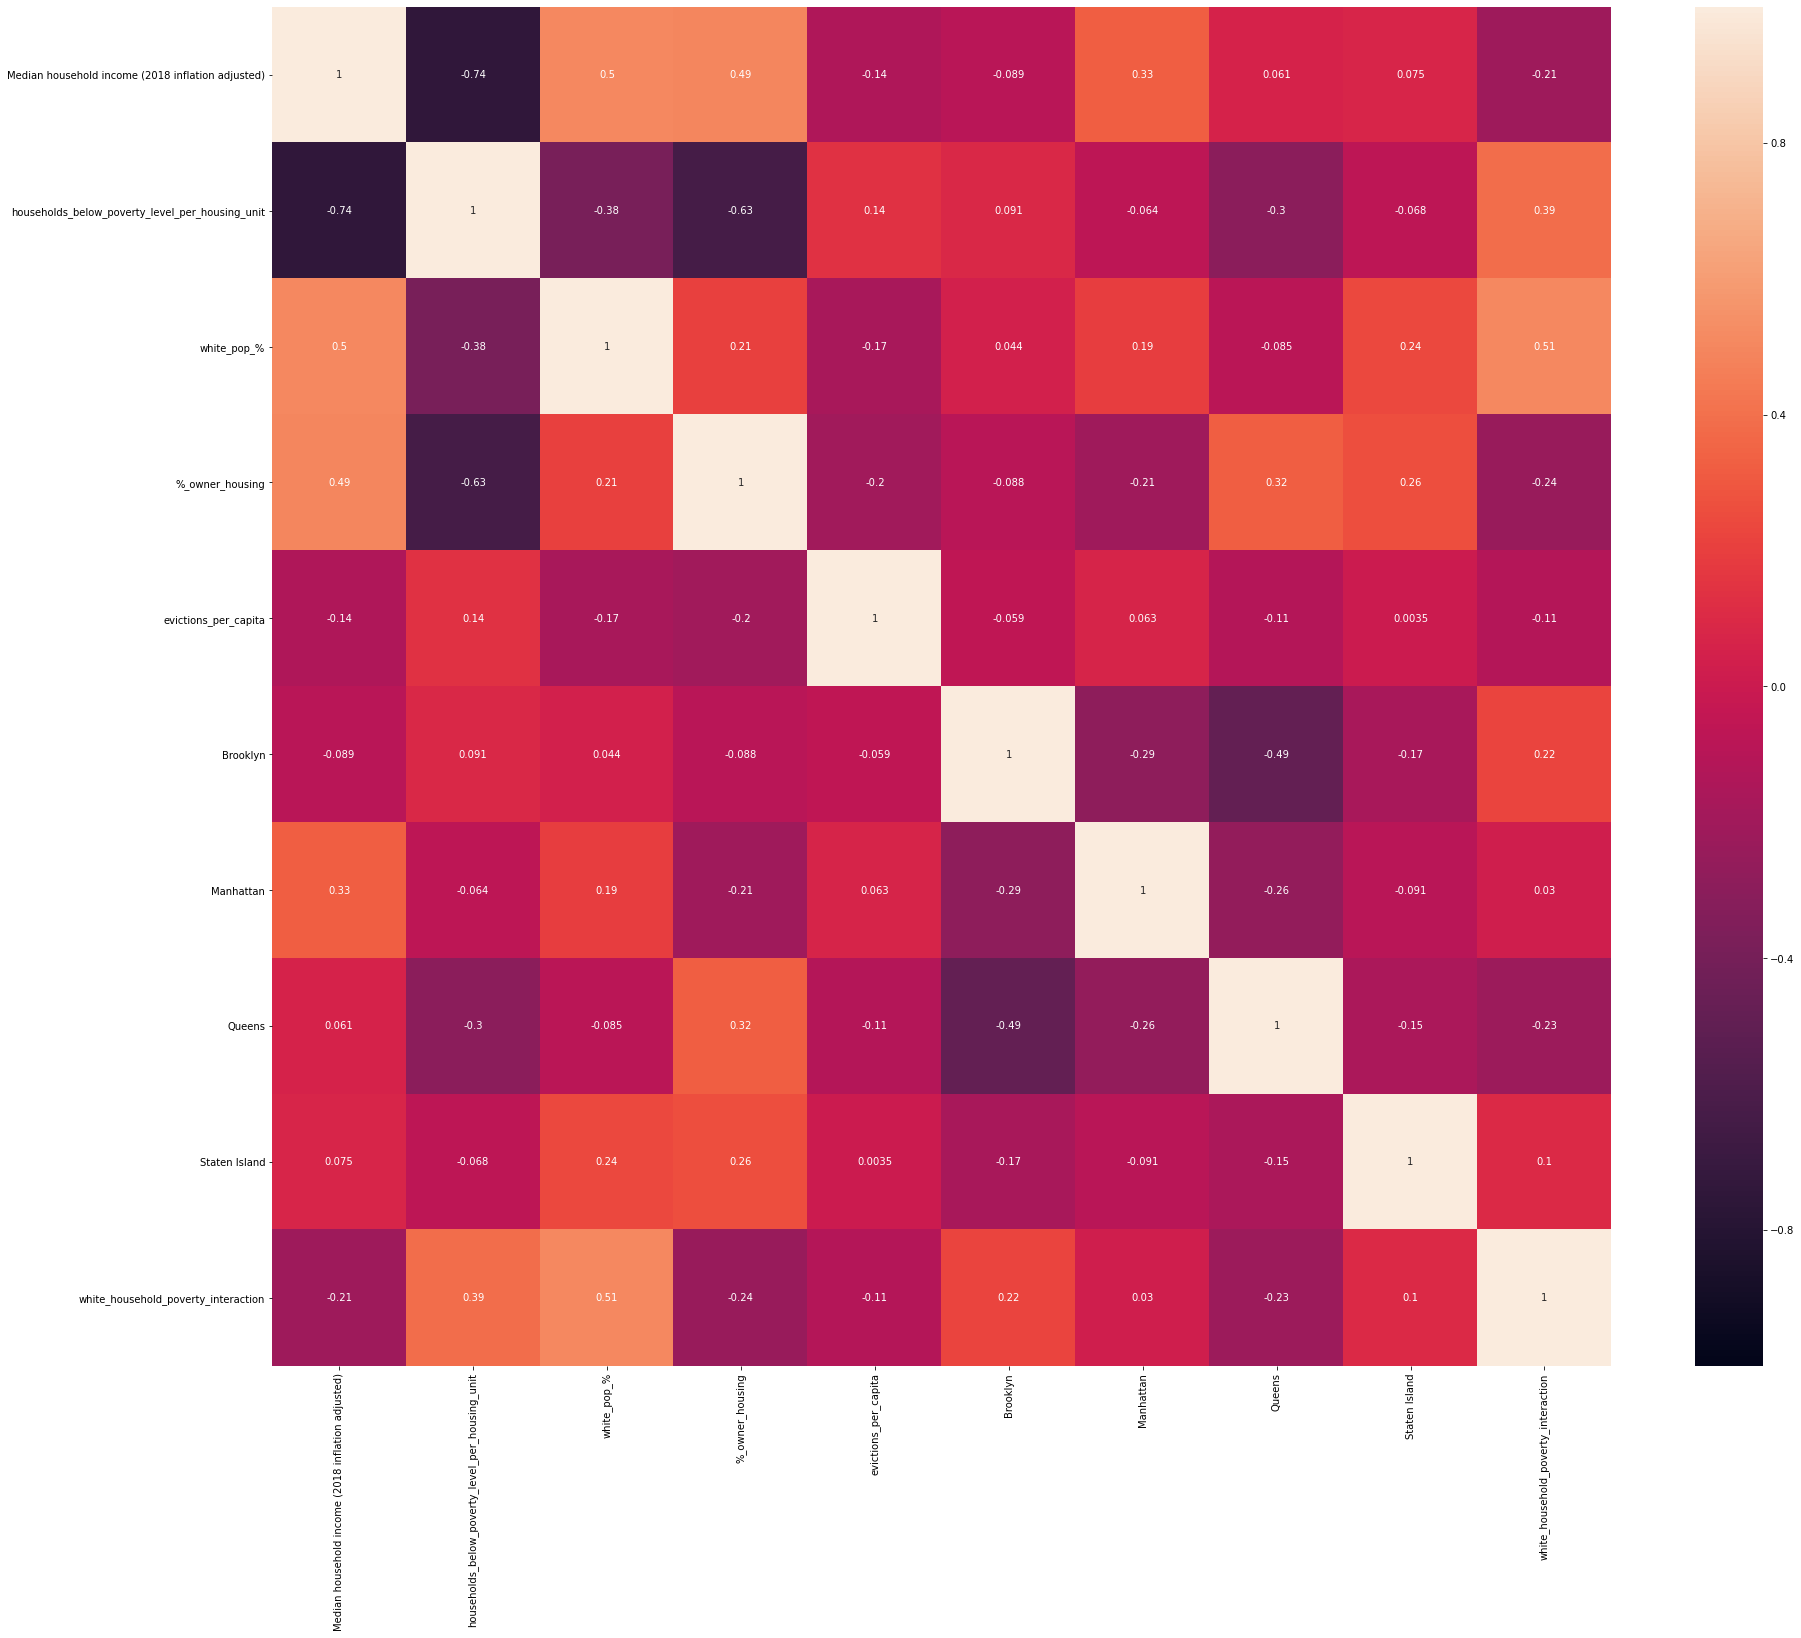

In [26]:
plt.figure(figsize=(30,25))
sns.heatmap(model_data.corr(),vmin=-1,vmax=1,annot=True)
plt.show()

Next Steps:
generate k best (rank feature strength)
vif test
generate models, complete with test function
visualize model results

In [27]:
model_data.columns

Index(['Median household income (2018 inflation adjusted)',
       'households_below_poverty_level_per_housing_unit', 'white_pop_%',
       '%_owner_housing', 'evictions_per_capita', 'Brooklyn', 'Manhattan',
       'Queens', 'Staten Island', 'white_household_poverty_interaction'],
      dtype='object')

In [28]:
model_data.isna().mean()

Median household income (2018 inflation adjusted)    0.029561
households_below_poverty_level_per_housing_unit      0.023095
white_pop_%                                          0.019400
%_owner_housing                                      0.023095
evictions_per_capita                                 0.014781
Brooklyn                                             0.000000
Manhattan                                            0.000000
Queens                                               0.000000
Staten Island                                        0.000000
white_household_poverty_interaction                  0.023095
dtype: float64

In [29]:
model_data

,Median household income (2018 inflation adjusted),households_below_poverty_level_per_housing_unit,white_pop_%,%_owner_housing,evictions_per_capita,Brooklyn,Manhattan,Queens,Staten Island,white_household_poverty_interaction
tract_id,,,,,,,,,,
"Census Tract 9, Richmond County, New York",53523.0,0.302941,0.339540,0.405882,0.021906,0,0,0,1,0.102861
"Census Tract 98, New York County, New York",126500.0,0.046897,0.830972,0.448366,0.005417,0,1,0,0,0.038970
"Census Tract 100, New York County, New York",94938.0,0.090121,0.792421,0.234835,0.009615,0,1,0,0,0.071414
"Census Tract 102, New York County, New York",128750.0,0.142857,0.640000,0.551020,0.170000,0,1,0,0,0.091429
"Census Tract 104, New York County, New York",125156.0,0.052539,0.704026,0.499124,0.015234,0,1,0,0,0.036989
...,...,...,...,...,...,...,...,...,...,...
"Census Tract 212, Queens County, New York",43173.0,0.226290,0.183305,0.181364,0.011618,0,0,1,0,0.041480
"Census Tract 1072.01, Queens County, New York",85147.0,0.067358,0.925022,0.777202,0.001331,0,0,1,0,0.062307
"Census Tract 1072.02, Queens County, New York",NaN,NaN,NaN,NaN,NaN,0,0,1,0,NaN


In [30]:
data[data['evictions_per_capita'].isna()]

,boro_name,Total population,Median age (years),Sex ratio (males per 100 females),Age dependency ratio,Occupied housing units,Owner-occupied housing units,Renter-occupied housing units,Households below poverty level (12 months),Median household income (2018 inflation adjusted),...,black_pop_%,native_american_pop_%,asian_pop_%,other_race_%,hispanic_pop_%,%_owner_housing,%_rental_housing,#_evictions,households_below_poverty_level_per_housing_unit,evictions_per_capita
tract_id,,,,,,,,,,,,,,,,,,,,,
"Census Tract 86, Kings County, New York",Brooklyn,0,NaN,NaN,NaN,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
"Census Tract 613.02, Queens County, New York",Queens,0,NaN,NaN,NaN,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
"Census Tract 1, New York County, New York",Manhattan,0,NaN,NaN,NaN,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
"Census Tract 175, Kings County, New York",Brooklyn,0,NaN,NaN,NaN,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
"Census Tract 624, Queens County, New York",Queens,0,NaN,NaN,NaN,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
"Census Tract 999, Queens County, New York",Queens,0,NaN,NaN,NaN,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
"Census Tract 154, Kings County, New York",Brooklyn,0,NaN,NaN,NaN,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
"Census Tract 852, Kings County, New York",Brooklyn,0,NaN,NaN,NaN,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
"Census Tract 407, Kings County, New York",Brooklyn,0,NaN,NaN,NaN,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [31]:
data.isna().mean()

boro_name                                            0.000000
Total population                                     0.000000
Median age (years)                                   0.020323
Sex ratio (males per 100 females)                    0.022171
Age dependency ratio                                 0.022171
Occupied housing units                               0.000000
Owner-occupied housing units                         0.000000
Renter-occupied housing units                        0.000000
Households below poverty level (12 months)           0.000000
Median household income (2018 inflation adjusted)    0.029561
Households receiving food stamps (12 months)         0.000000
Families                                             0.000000
White alone                                          0.000000
Black or African American alone                      0.000000
American Indian and Alaska Native alone              0.000000
Asian alone                                          0.000000
Some oth

Warning, evictions in park areas ignored in this as anomalous. (0 population and missing data
Removing ~3% of census tracts is not problematic, but the missing data is not random and is part of the quirks of having census tracts with no formal population and residences.

In [32]:
model_data_no_nulls = model_data.dropna()

In [33]:
model_data_no_nulls.isna().mean()

Median household income (2018 inflation adjusted)    0.0
households_below_poverty_level_per_housing_unit      0.0
white_pop_%                                          0.0
%_owner_housing                                      0.0
evictions_per_capita                                 0.0
Brooklyn                                             0.0
Manhattan                                            0.0
Queens                                               0.0
Staten Island                                        0.0
white_household_poverty_interaction                  0.0
dtype: float64

In [34]:
model_data_no_nulls['evictions_per_capita'].max()

0.34065934065934067

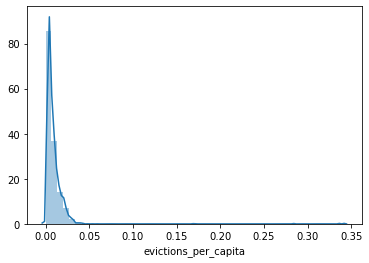

In [35]:
sns.distplot(model_data_no_nulls['evictions_per_capita'])

In [36]:
#remove extreme outliers
model_data_no_nulls=model_data_no_nulls[model_data_no_nulls['evictions_per_capita']<.05]

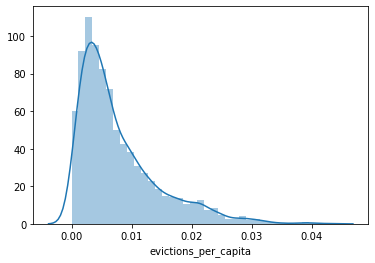

In [37]:
sns.distplot(model_data_no_nulls['evictions_per_capita'])

In [38]:
len(model_data_no_nulls.columns)

10

In [39]:
def outlier_test(series):
    z_scores = zscore(series)
    for threshold in range(2,3):
        print(series.name,':')
        print("The score threshold is: {}".format(threshold))
        print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

In [40]:
for col in model_data_no_nulls.columns:
    outlier_test(model_data_no_nulls[col])

Median household income (2018 inflation adjusted) :
The score threshold is: 2
Number of outliers is: 98
households_below_poverty_level_per_housing_unit :
The score threshold is: 2
Number of outliers is: 115
white_pop_% :
The score threshold is: 2
Number of outliers is: 0
%_owner_housing :
The score threshold is: 2
Number of outliers is: 47
evictions_per_capita :
The score threshold is: 2
Number of outliers is: 119
Brooklyn :
The score threshold is: 2
Number of outliers is: 0
Manhattan :
The score threshold is: 2
Number of outliers is: 274
Queens :
The score threshold is: 2
Number of outliers is: 0
Staten Island :
The score threshold is: 2
Number of outliers is: 107
white_household_poverty_interaction :
The score threshold is: 2
Number of outliers is: 74


In [41]:
def winsor(df,col,low,high):
    df[col+'_winsor'] = winsorize(df[col], (low, high))
    plt.figure(figsize=(30,20))
    plt.subplot(4,3,1)
    sns.distplot(df[col])
    plt.title(col)
    plt.subplot(4,3,2)
    sns.distplot(df[col+'_winsor'])
    plt.title(col+'_winsor')
    plt.show()

In [42]:
model_data_no_nulls.columns

Index(['Median household income (2018 inflation adjusted)',
       'households_below_poverty_level_per_housing_unit', 'white_pop_%',
       '%_owner_housing', 'evictions_per_capita', 'Brooklyn', 'Manhattan',
       'Queens', 'Staten Island', 'white_household_poverty_interaction'],
      dtype='object')

In [43]:
winsor_columns = [#'Median age (years)', 'Sex ratio (males per 100 females)',
                  #'Age dependency ratio'
                   'Median household income (2018 inflation adjusted)']

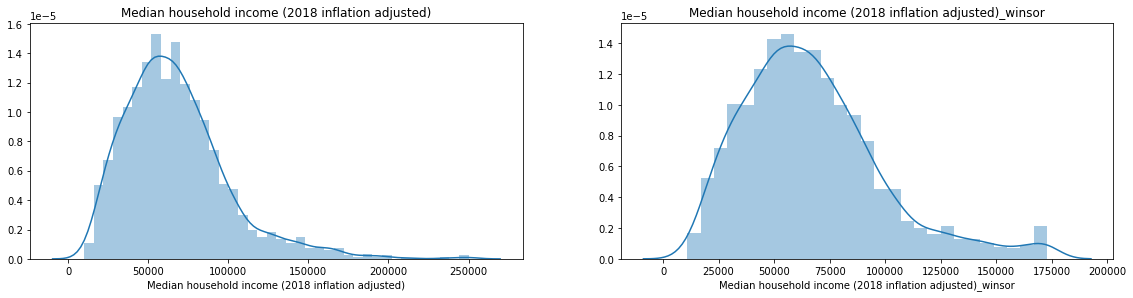

In [44]:
for col in winsor_columns:
    winsor(model_data_no_nulls,col,.001,.01)

not every column needs to winsorized.  % variables are bounded.  The most important need is in evictions per capita which has extreme outliers.  While it is not usually appropriate to adjust the dependent variable, it is better than outright removing the outliers which are few.

In [45]:
model_data_no_nulls=model_data_no_nulls.drop(columns=winsor_columns)

In [46]:
model_data_no_nulls.columns

Index(['households_below_poverty_level_per_housing_unit', 'white_pop_%',
       '%_owner_housing', 'evictions_per_capita', 'Brooklyn', 'Manhattan',
       'Queens', 'Staten Island', 'white_household_poverty_interaction',
       'Median household income (2018 inflation adjusted)_winsor'],
      dtype='object')

In [47]:
X= model_data_no_nulls.drop(columns=['evictions_per_capita'])
y= model_data_no_nulls['evictions_per_capita']

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=32)



preprocessing = ColumnTransformer(
    [
        ('scaler', StandardScaler(), X.columns)
    ],
    remainder="passthrough",
)

pipeline = Pipeline(
    [
        ("preprocessing", preprocessing),
        ('select_best', SelectKBest(f_regression,k='all'))
    ], verbose=True
)


ranked_variables = pipeline.fit(X_train,y_train)

[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ....... (step 2 of 2) Processing select_best, total=   0.0s


In [48]:
feature_scores = pd.DataFrame({'var':X.columns,'importance':ranked_variables.named_steps["select_best"].scores_})
feature_scores =feature_scores.sort_values(axis=0,by='importance',ascending=False)

In [49]:
feature_scores

,var,importance
1,white_pop_%,687.024362
0,households_below_poverty_level_per_housing_unit,465.512200
2,%_owner_housing,427.295085
8,Median household income (2018 inflation adjust...,410.964298
5,Queens,78.309570
7,white_household_poverty_interaction,68.288547
6,Staten Island,14.776372
4,Manhattan,5.823055
3,Brooklyn,4.991252


While it is important to recognize correlation between some variables such as white and black pop %, it is not unsurprising that race, ownership and poverty play an important part.  Countries/Boroughs are relatively unimportant.  It is interesting that the interaction of black population % and household poverty is very important.

In [50]:
def vif_test(X_train):
    vifs = []
    for i in range(X_train.shape[1]):
        vif = variance_inflation_factor(X_train.values, i)
        vifs.append(vif)
    display(pd.Series(vifs, index=X_train.columns, name='vif table'))

In [51]:
#scores of model strength and metrics for linear regression
#none of the models pass the linear regression tests
def model_metrics(model):
    y_pred_train=model.predict(X_train)
    y_pred_test=model.predict(X_test)
    evaluators = ['r^2_train','r^2_test','mae','mse','rmse']
    evaluations = [model.score(X_train,y_train),
                  model.score(X_test,y_test),
                  mean_absolute_error(y_test, y_pred_test),
                  mse(y_test, y_pred_test),
                  rmse(y_test, y_pred_test)]

    evaluation_df = pd.DataFrame({'evaluators': evaluators,'values':evaluations})

    plt.scatter(y_test, y_pred_test)
    plt.plot(y_test, y_test, color="red")
    plt.xlabel("true values")
    plt.ylabel("predicted values")
    plt.title("Charges: true and predicted values")
    plt.show()

    display(evaluation_df)
    
    train_resid = y_train - y_pred_train
    test_resid = y_test - y_pred_test
    _, _, _, p = sms.het_breuschpagan(train_resid, X_train)
    jb_stats = jarque_bera(train_resid)
    norm_stats = normaltest(train_resid)
    qqplot(train_resid, line="s")
    print('breuschpagan:', p)
    print('jarque_bera:', jb_stats)
    print('normaltest:', norm_stats)
    plt.show()

In [52]:
X= model_data_no_nulls.drop(columns=['evictions_per_capita'])
y= model_data_no_nulls['evictions_per_capita']

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=32)


vif_test(X_train)

households_below_poverty_level_per_housing_unit              3.699622
white_pop_%                                                 12.144800
%_owner_housing                                              6.379977
Brooklyn                                                     3.348005
Manhattan                                                    2.370547
Queens                                                       3.053367
Staten Island                                                1.645229
white_household_poverty_interaction                          7.817745
Median household income (2018 inflation adjusted)_winsor    14.475369
Name: vif table, dtype: float64

While some variables have high values, they are not excessively high and their ability to account for specific demographics makes their inclusion thematically worthwhile.

Elastic Net Model with Standardization:

In [53]:
X= model_data_no_nulls.drop(columns=['evictions_per_capita'])
y= model_data_no_nulls['evictions_per_capita']

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=32)


preprocessing = ColumnTransformer(
    [
        ('scaler', StandardScaler(), X_train.columns)
    ],
    remainder="passthrough",
)

pipeline = Pipeline(
    [
        ("preprocessing", preprocessing),
        ('elastic', ElasticNet())
    ], verbose=True
)


grid = {
    "elastic__alpha": [.00001,.001,.01,.05,.1,.15,.2,.25,.5],
    "elastic__l1_ratio": [.00001,.001,.01,.05,.1,.15,.2,.25,.5],
    'elastic__normalize': [True,False],
    "elastic__max_iter": [1000],
}

pipeline_cv1 = GridSearchCV(pipeline, grid, verbose=1,cv=5,n_jobs=3)
pipeline_cv1.fit(X_train, y_train)
#try in reverse

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done 428 tasks      | elapsed:    2.7s


[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ........... (step 2 of 2) Processing elastic, total=   0.0s


[Parallel(n_jobs=3)]: Done 810 out of 810 | elapsed:    4.1s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         Index(['households_below_poverty_level_per_housing_unit', 'white_pop_%',
       '%_owner_housing', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island',
       'white_household_poverty_interaction',
       'Median household income (2018 inflation adjusted)_winsor'],
      dtype='object'))])),
                                       ('elastic', ElasticNet())],
                                verbose=True),
             n_jobs=3,
             param_grid={'elastic__alpha': [1e-05, 0.001, 0.01, 0.05, 0.1, 0.15,
                                            0.2, 0.25, 0.5],
                       

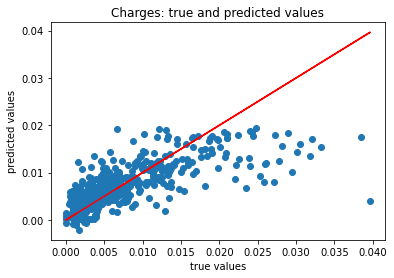

,evaluators,values
0,r^2_train,0.498275
1,r^2_test,0.481869
2,mae,0.003366
3,mse,0.000026
4,rmse,0.005112


breuschpagan: 4.516044698068864e-87
jarque_bera: (1492.9758655845735, 0.0)
normaltest: NormaltestResult(statistic=421.71646295554683, pvalue=2.663382889289022e-92)


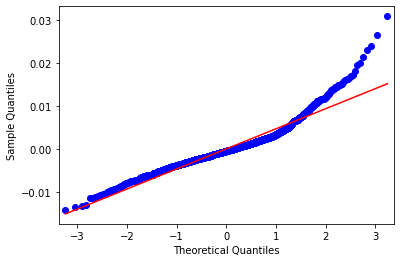

{'elastic__alpha': 0.001, 'elastic__l1_ratio': 0.01, 'elastic__max_iter': 1000, 'elastic__normalize': False}


In [54]:
model_metrics(pipeline_cv1)
print(pipeline_cv1.best_params_)

In [55]:
coef = pipeline_cv1.best_estimator_.named_steps["elastic"].coef_
coef_pd = pd.DataFrame({'var':X_train.columns,'coef':coef})
coef_pd =coef_pd.sort_values(axis=0,by='coef',ascending=False)
coef_pd

,var,coef
0,households_below_poverty_level_per_housing_unit,0.000885
8,Median household income (2018 inflation adjust...,-0.000003
6,Staten Island,-0.000273
7,white_household_poverty_interaction,-0.001064
4,Manhattan,-0.001422
2,%_owner_housing,-0.001875
3,Brooklyn,-0.001882
1,white_pop_%,-0.002055
5,Queens,-0.002277


In [56]:
pipeline_cv1.best_estimator_.named_steps["elastic"].coef_

array([ 8.84787459e-04, -2.05538370e-03, -1.87537843e-03, -1.88196517e-03,
       -1.42165934e-03, -2.27685220e-03, -2.73287125e-04, -1.06418925e-03,
       -3.16192976e-06])

In [57]:
pipeline_cv1.best_estimator_.named_steps['elastic'].score

<bound method RegressorMixin.score of ElasticNet(alpha=0.001, l1_ratio=0.01)>

Despite winsorizing variables and adding interaction variables, the model still performs poorly

Linear Regression with Standaridization:

In [58]:
X= model_data_no_nulls.drop(columns=['evictions_per_capita'])
y= model_data_no_nulls['evictions_per_capita']

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=32)


preprocessing = ColumnTransformer(
    [
        ('scaler', StandardScaler(), X_train.columns)
    ],
    remainder="passthrough",
)

pipeline = Pipeline(
    [
        ("preprocessing", preprocessing),
        ('lin_reg', LinearRegression())
    ], verbose=True
)


grid = {
    'lin_reg__normalize': [True,False]
}

pipeline_cv2 = GridSearchCV(pipeline, grid, verbose=1,cv=5,n_jobs=3)
pipeline_cv2.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ........... (step 2 of 2) Processing lin_reg, total=   0.0s


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         Index(['households_below_poverty_level_per_housing_unit', 'white_pop_%',
       '%_owner_housing', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island',
       'white_household_poverty_interaction',
       'Median household income (2018 inflation adjusted)_winsor'],
      dtype='object'))])),
                                       ('lin_reg', LinearRegression())],
                                verbose=True),
             n_jobs=3, param_grid={'lin_reg__normalize': [True, False]},
             verbose=1)

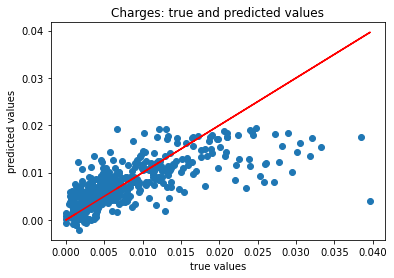

,evaluators,values
0,r^2_train,0.498332
1,r^2_test,0.482513
2,mae,0.003364
3,mse,0.000026
4,rmse,0.005109


breuschpagan: 5.846299016280892e-87
jarque_bera: (1475.1224522121847, 0.0)
normaltest: NormaltestResult(statistic=417.7977651718227, pvalue=1.8895918937956278e-91)


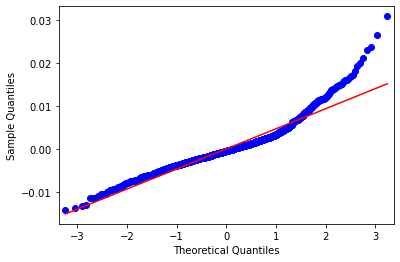

{'lin_reg__normalize': False}


In [59]:
model_metrics(pipeline_cv2)
print(pipeline_cv2.best_params_)

In [60]:
coef = pipeline_cv2.best_estimator_.named_steps["lin_reg"].coef_
coef_pd = pd.DataFrame({'var':X_train.columns,'coef':coef})
coef_pd =coef_pd.sort_values(axis=0,by='coef',ascending=False)
coef_pd

,var,coef
0,households_below_poverty_level_per_housing_unit,8.831269e-04
8,Median household income (2018 inflation adjust...,5.434504e-07
6,Staten Island,-3.078218e-04
7,white_household_poverty_interaction,-1.074312e-03
4,Manhattan,-1.473315e-03
2,%_owner_housing,-1.881425e-03
3,Brooklyn,-1.943553e-03
1,white_pop_%,-2.048337e-03
5,Queens,-2.338611e-03


Random Forest:

In [61]:
X= model_data_no_nulls.drop(columns=['evictions_per_capita'])
y= model_data_no_nulls['evictions_per_capita']


X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=32)


preprocessing = ColumnTransformer(
    [
        ('scaler', StandardScaler(), X_train.columns)
    ],
    remainder="passthrough",
)

pipeline = Pipeline(
    [
        ("preprocessing", preprocessing),
        ('forest', RandomForestRegressor())
    ], verbose=True
)


grid = {
    "forest__n_estimators": [100],
    'forest__min_samples_split': [25],
    "forest__max_depth": [5,10,15],
    "forest__max_features": [5,10,15],
    "forest__min_samples_leaf": [5,10,15]
}

pipeline_cv3 = GridSearchCV(pipeline, grid, verbose=1,cv=3,n_jobs=3)
pipeline_cv3.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  81 out of  81 | elapsed:    3.2s finished


[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............ (step 2 of 2) Processing forest, total=   0.3s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         Index(['households_below_poverty_level_per_housing_unit', 'white_pop_%',
       '%_owner_housing', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island',
       'white_household_poverty_interaction',
       'Median household income (2018 inflation adjusted)_winsor'],
      dtype='object'))])),
                                       ('forest', RandomForestRegressor())],
                                verbose=True),
             n_jobs=3,
             param_grid={'forest__max_depth': [5, 10, 15],
                         'forest__max_features': [5, 10, 15],
                         'forest__

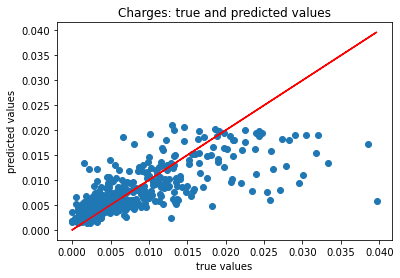

,evaluators,values
0,r^2_train,0.683847
1,r^2_test,0.507593
2,mae,0.003152
3,mse,0.000025
4,rmse,0.004984


breuschpagan: 3.4576587568221933e-66
jarque_bera: (3479.343102645481, 0.0)
normaltest: NormaltestResult(statistic=585.9096937304062, pvalue=5.906450377506706e-128)


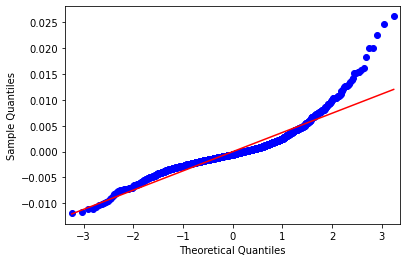

{'forest__max_depth': 10, 'forest__max_features': 5, 'forest__min_samples_leaf': 5, 'forest__min_samples_split': 25, 'forest__n_estimators': 100}


In [62]:
model_metrics(pipeline_cv3)
print(pipeline_cv3.best_params_)

Basic models perform reasonably well after removing outliers.  A large gap remains between train and test r^2.

In [63]:
X= model_data_no_nulls.drop(columns=['evictions_per_capita'])
y= model_data_no_nulls['evictions_per_capita']


X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=32)


preprocessing = ColumnTransformer(
    [
        ('scaler', StandardScaler(), X_train.columns)
    ],
    remainder="passthrough",
)

pipeline = Pipeline(
    [
        ("preprocessing", preprocessing),
        ('xgb', xgb.XGBRegressor())
    ])

grid = {
    "xgb__n_estimators": [100],
    "xgb__max_depth": [5,10,15],
    "xgb__learning_rate": [.05,.1,.2],
    "xgb__verbosity": [0]
}

pipeline_cv4 = GridSearchCV(pipeline, grid, verbose=1,cv=3,n_jobs=3)
pipeline_cv4.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  27 out of  27 | elapsed:    1.9s finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         Index(['households_below_poverty_level_per_housing_unit', 'white_pop_%',
       '%_owner_housing', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island',
       'white_household_poverty_interaction',
       'Median household income (2018 infla...
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     ran

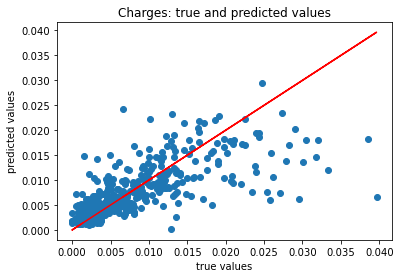

,evaluators,values
0,r^2_train,0.796794
1,r^2_test,0.470687
2,mae,0.003250
3,mse,0.000027
4,rmse,0.005167


breuschpagan: 2.3894407574747006e-81
jarque_bera: (717.5934009192409, 0.0)
normaltest: NormaltestResult(statistic=296.8639753652254, pvalue=3.441967866364026e-65)


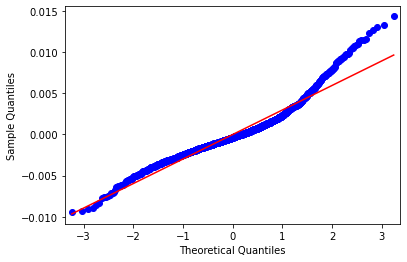

{'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__n_estimators': 100, 'xgb__verbosity': 0}


In [64]:
model_metrics(pipeline_cv4)
print(pipeline_cv4.best_params_)

Naturally xgboost works much better at the training set, but the gap in r^2 is troubling.  The individual effects are not as visible making the model less compelling.

After removing outliers for evictions per capita, the model performs a lot better.  It is worth noting that removing these outliers does skew the model away from being able to predict exactly those kind of anomalous eviction rates.

In [65]:
X= model_data_no_nulls.drop(columns=['evictions_per_capita'])
y= model_data_no_nulls['evictions_per_capita']
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()

In [66]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     evictions_per_capita   R-squared:                       0.496
Model:                              OLS   Adj. R-squared:                  0.494
Method:                   Least Squares   F-statistic:                     228.5
Date:                  Tue, 16 Feb 2021   Prob (F-statistic):          4.66e-303
Time:                          12:08:02   Log-Likelihood:                 8235.5
No. Observations:                  2097   AIC:                        -1.645e+04
Df Residuals:                      2087   BIC:                        -1.639e+04
Df Model:                             9                                         
Covariance Type:              nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                        0.0172      0.001     22.833      0.000       0.016       0.019
households_below_poverty_level_per_housing_unit              0.0074      0.002      3.912      0.000       0.004       0.011
white_pop_%                                                 -0.0070      0.001     -9.738      0.000      -0.008      -0.006
%_owner_housing                                             -0.0075      0.001    -12.042      0.000      -0.009      -0.006
Brooklyn                                                    -0.0043      0.000    -12.317      0.000      -0.005      -0.004
Manhattan                                                   -0.0046      0.000    -10.146      0.000      -0.005      -0.004
Queens                                                      -0.0052      0.000    -13.871      0.000      -0.006      -0.004
Staten Island                                               -0.0015      0.001     -2.440      0.015      -0.003      -0.000
white_household_poverty_interaction                         -0.0182      0.004     -5.162      0.000      -0.025      -0.011
Median household income (2018 inflation adjusted)_winsor -8.939e-10   6.32e-09     -0.141      0.888   -1.33e-08    1.15e-08
==============================================================================
Omnibus:                      618.090   Durbin-Watson:                   1.652
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2741.660
Skew:                           1.350   Prob(JB):                         0.00
Kurtosis:                       7.908   Cond. No.                     2.67e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Given that ownership-income interaction isn't statistically significant, it was removed.  Aside from median income, the other variables are statistically significant